In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

# Подготовка датафрейма

In [2]:
df_train = pd.read_csv('.\\train.csv', sep=';')
df_train.dtypes

product      int64
var_1      float64
var_2        int64
var_3      float64
var_4        int64
var_5      float64
var_6        int64
var_7      float64
var_8        int64
var_9      float64
var_10       int64
var_11     float64
var_12     float64
dtype: object

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  5400 non-null   int64  
 1   var_1    5400 non-null   float64
 2   var_2    5400 non-null   int64  
 3   var_3    5400 non-null   float64
 4   var_4    5400 non-null   int64  
 5   var_5    5400 non-null   float64
 6   var_6    5400 non-null   int64  
 7   var_7    5400 non-null   float64
 8   var_8    5400 non-null   int64  
 9   var_9    5400 non-null   float64
 10  var_10   5400 non-null   int64  
 11  var_11   5400 non-null   float64
 12  var_12   5400 non-null   float64
dtypes: float64(7), int64(6)
memory usage: 548.6 KB


In [4]:
df_train

,product,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12
0,0,6353.887751,0,3675.878619,0,0.301215,1,0.203161,0,0.849829,0,34.256347,1045.876061
1,0,6165.571090,0,3186.979995,1,0.510307,0,0.135070,1,0.762936,0,42.090521,968.181717
2,0,5941.886918,1,2887.991939,0,0.570525,0,0.123050,1,0.770605,0,41.458076,982.316872
3,1,5820.913609,0,3623.374054,0,0.814172,0,0.111818,0,0.976490,0,39.682286,995.101315
4,2,6022.965184,0,2850.268819,0,0.359652,0,0.231531,0,0.745337,0,37.927108,930.222551
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,1,7404.111197,0,3605.908115,0,0.101962,0,0.329923,1,0.714294,0,39.406563,884.975500
5396,1,5717.312110,1,3377.796681,1,0.345731,0,0.220103,0,1.012404,0,36.404537,1001.751603
5397,0,6770.863216,0,3370.264101,0,0.270617,0,0.169337,1,0.842193,0,37.314561,995.757665
5398,1,6573.093388,0,3754.622698,0,0.428129,1,0.375134,1,0.679759,0,40.673347,978.156195


# Предварительный анализ

In [5]:
df_train.describe()

,product,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12
count,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000
mean,0.633704,6354.442053,0.279815,3420.197776,0.107037,0.237132,0.330741,0.224727,0.755926,0.778146,0.134259,39.030036,992.378380
std,0.692813,506.846604,0.448950,272.714213,0.309189,0.306929,0.470523,0.086390,0.429577,0.088349,0.340962,3.129742,78.802694
min,0.000000,4353.366793,0.000000,2391.003018,0.000000,-0.974838,0.000000,-0.079677,0.000000,0.415416,0.000000,25.338598,698.957598
25%,0.000000,6011.806650,0.000000,3237.276961,0.000000,0.030203,0.000000,0.166490,1.000000,0.720105,0.000000,36.896027,939.972706
50%,1.000000,6353.315711,0.000000,3419.555208,0.000000,0.239587,0.000000,0.224592,1.000000,0.778770,0.000000,39.024176,992.960007
75%,1.000000,6703.425477,1.000000,3601.737154,0.000000,0.434655,1.000000,0.281945,1.000000,0.837523,0.000000,41.164110,1046.480161
max,2.000000,8169.159370,1.000000,4397.818747,1.000000,1.281188,1.000000,0.518510,1.000000,1.058548,1.000000,50.610822,1294.335613


Мода

In [6]:
df_train.mode().mean()

product       0.000000
var_1      6354.442053
var_2         0.000000
var_3      3420.197776
var_4         0.000000
var_5         0.237132
var_6         0.000000
var_7         0.224727
var_8         1.000000
var_9         0.778146
var_10        0.000000
var_11       39.030036
var_12      992.378380
dtype: float64

Медиана

In [7]:
df_train.median()

product       1.000000
var_1      6353.315711
var_2         0.000000
var_3      3419.555208
var_4         0.000000
var_5         0.239587
var_6         0.000000
var_7         0.224592
var_8         1.000000
var_9         0.778770
var_10        0.000000
var_11       39.024176
var_12      992.960007
dtype: float64

График "Ящик с усами"

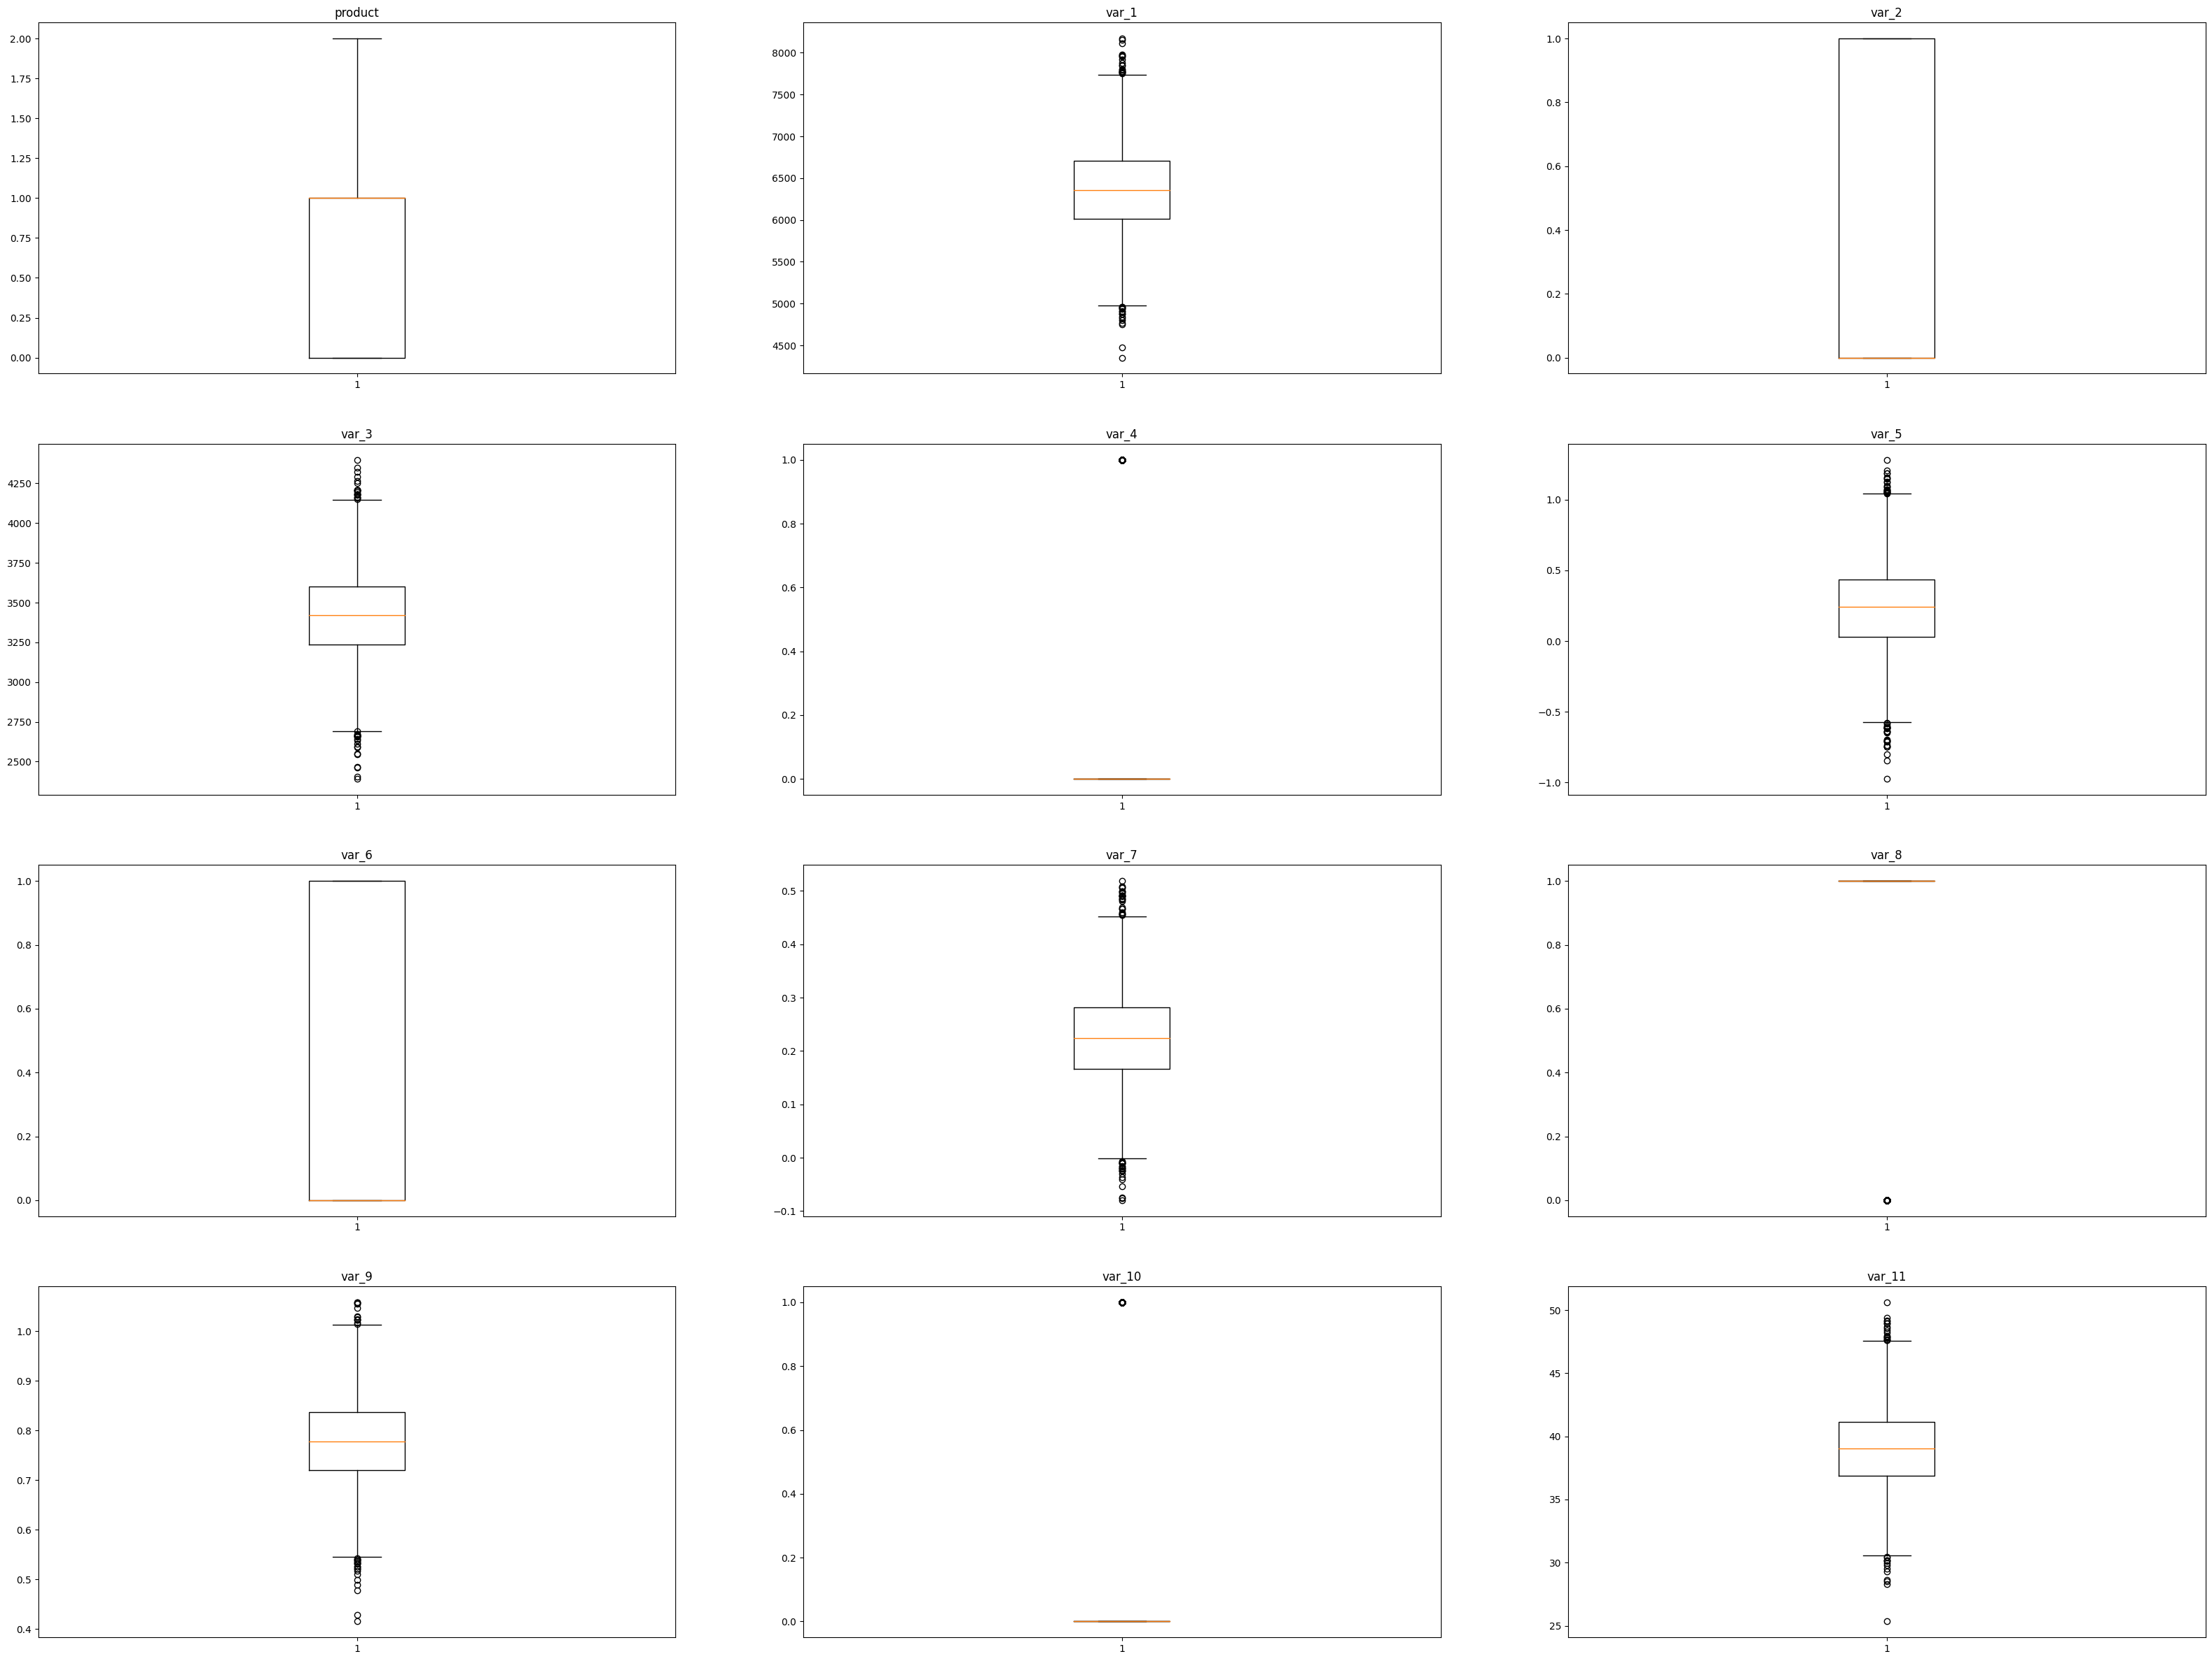

In [8]:
fig, ax = plt.subplots(4, 3, figsize=(40, 30))

i = 0
for axi in ax:
    for axj in axi:
        axj.boxplot(df_train[df_train.columns[i]])
        axj.set_title(df_train.columns[i])
        i += 1

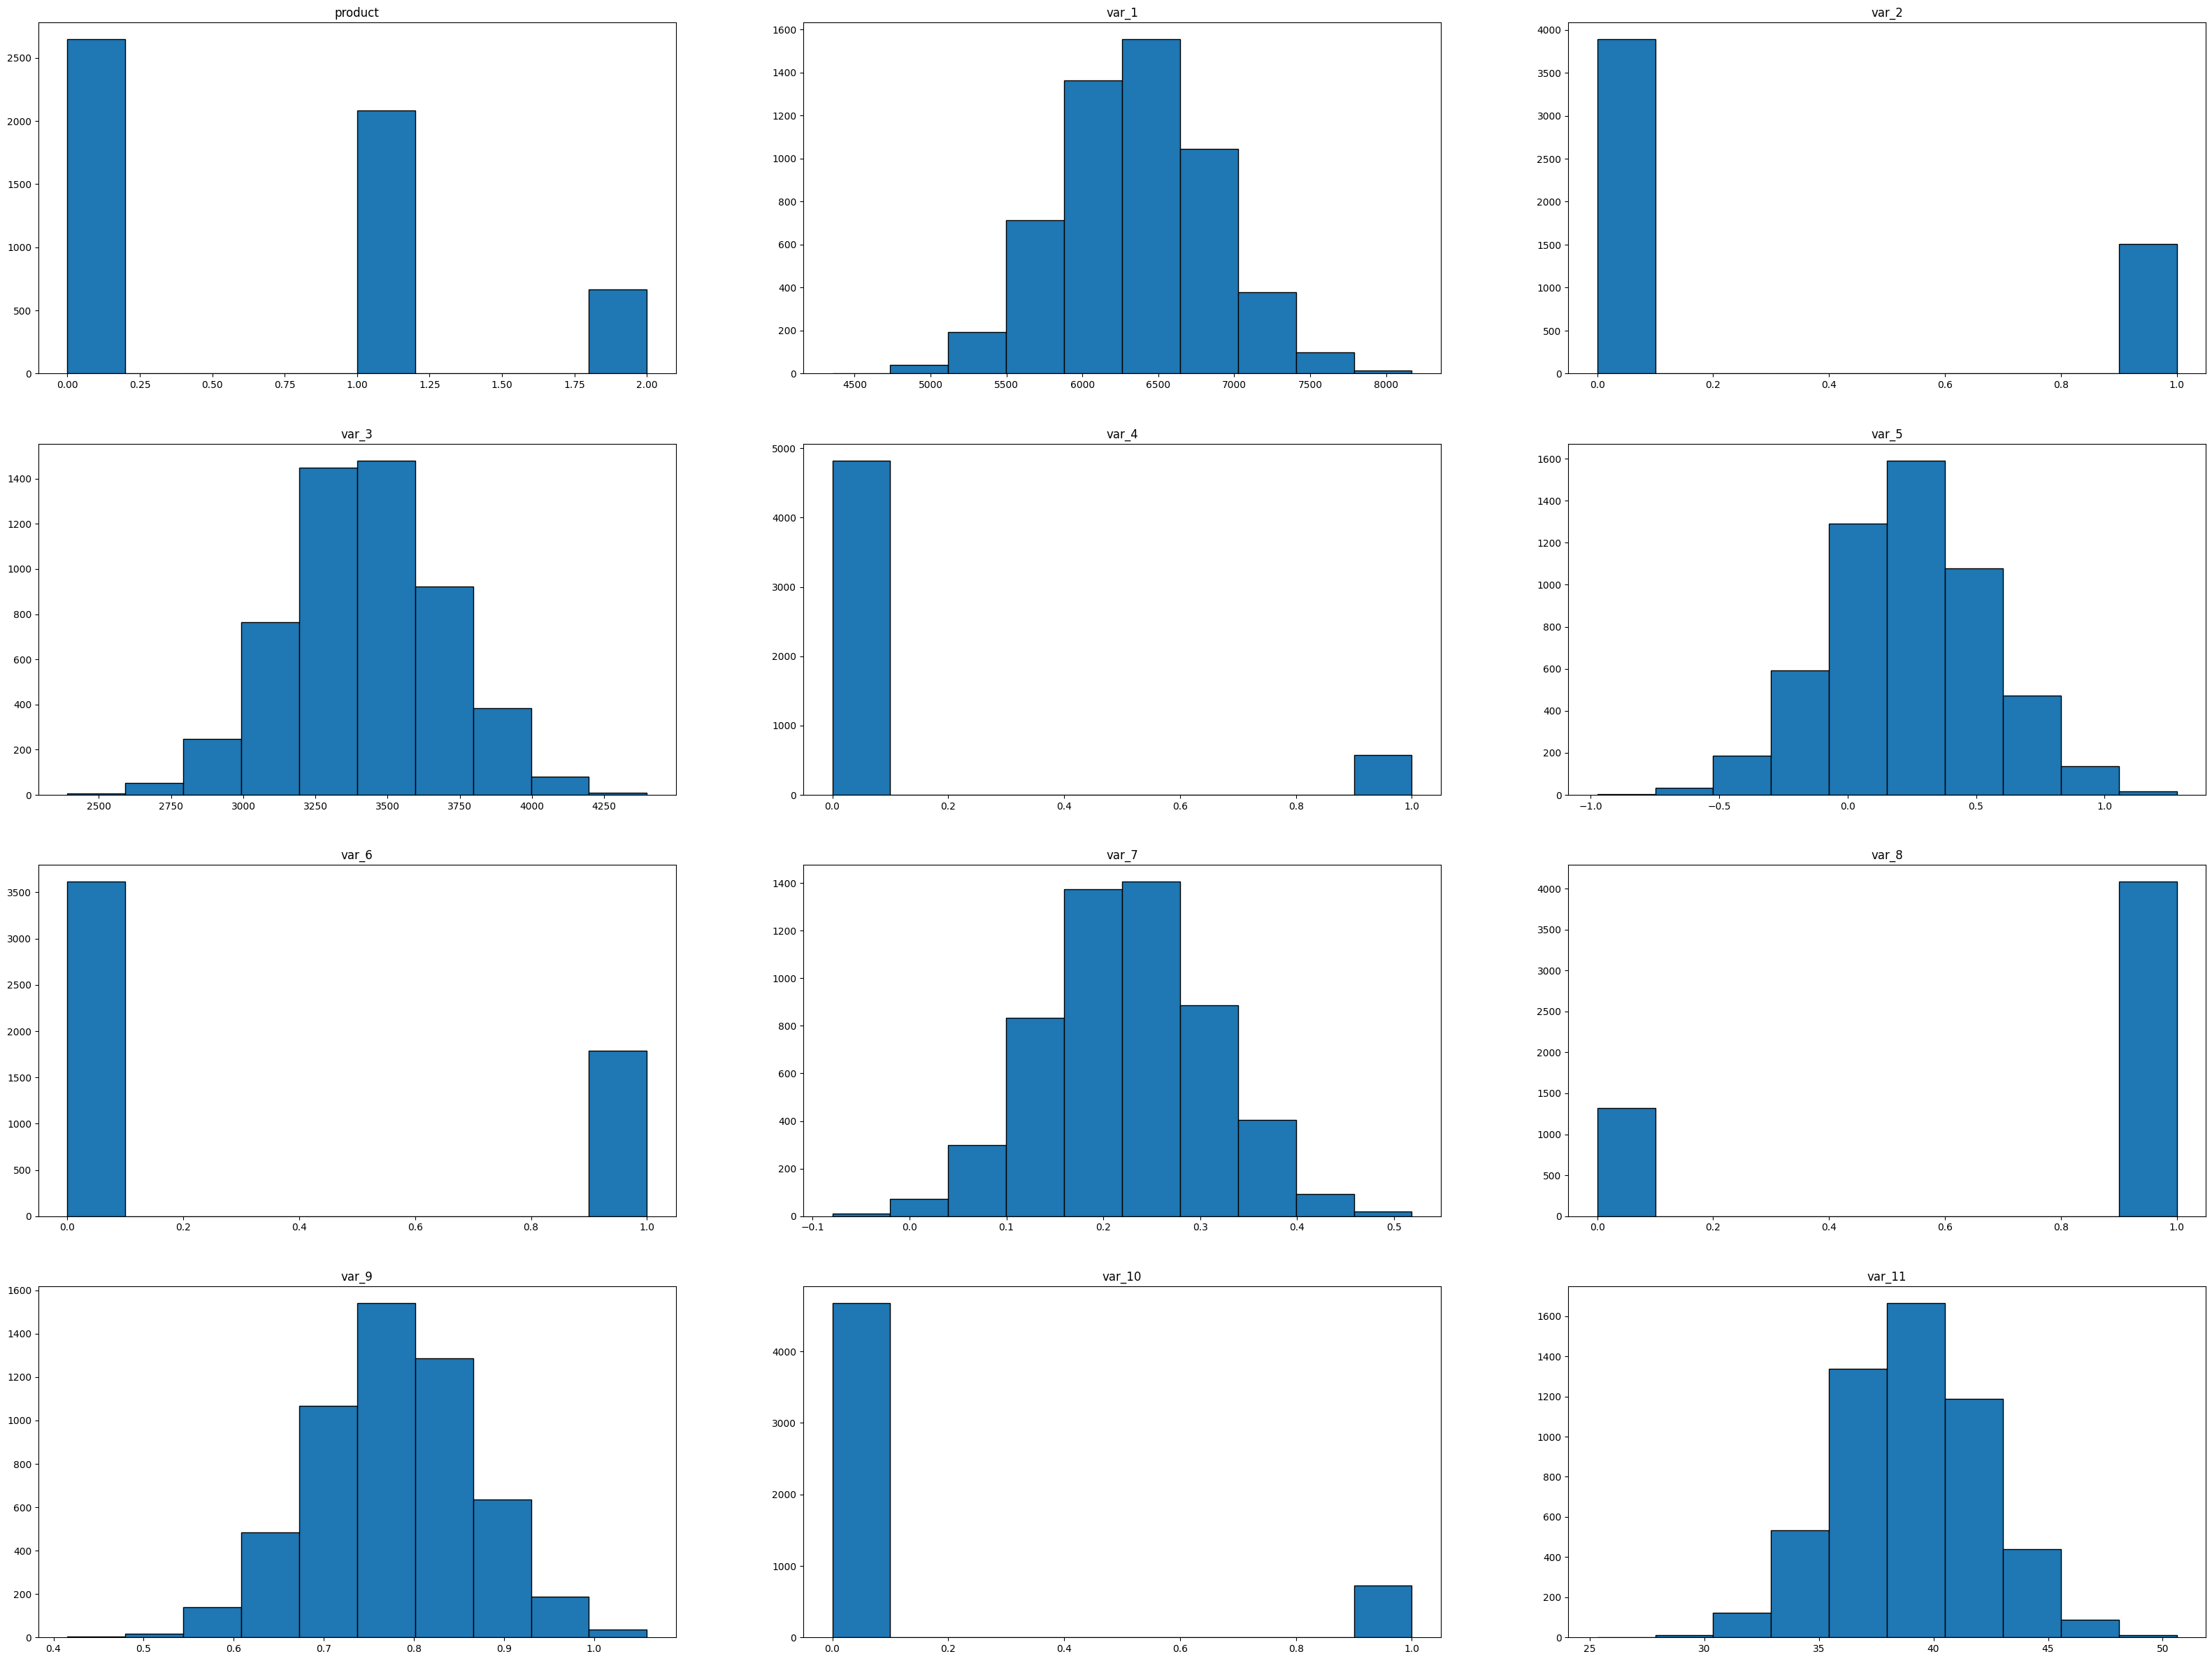

In [9]:
fig, ax = plt.subplots(4, 3, figsize=(40, 30))

i = 0
for axi in ax:
    for axj in axi:
        axj.hist(df_train[df_train.columns[i]], edgecolor='k')
        axj.set_title(df_train.columns[i])
        i += 1

In [10]:
from scipy.stats import normaltest
print('p-критерии:')
for i, item in enumerate(df_train.columns):
    print(f'{item}: {np.round(normaltest(df_train).pvalue[i], 3)}')

p-критерии:
product: 0.0
var_1: 0.678
var_2: 0.0
var_3: 0.885
var_4: 0.0
var_5: 0.727
var_6: 0.0
var_7: 0.612
var_8: 0.0
var_9: 0.335
var_10: 0.0
var_11: 0.968
var_12: 0.149


<Axes: >

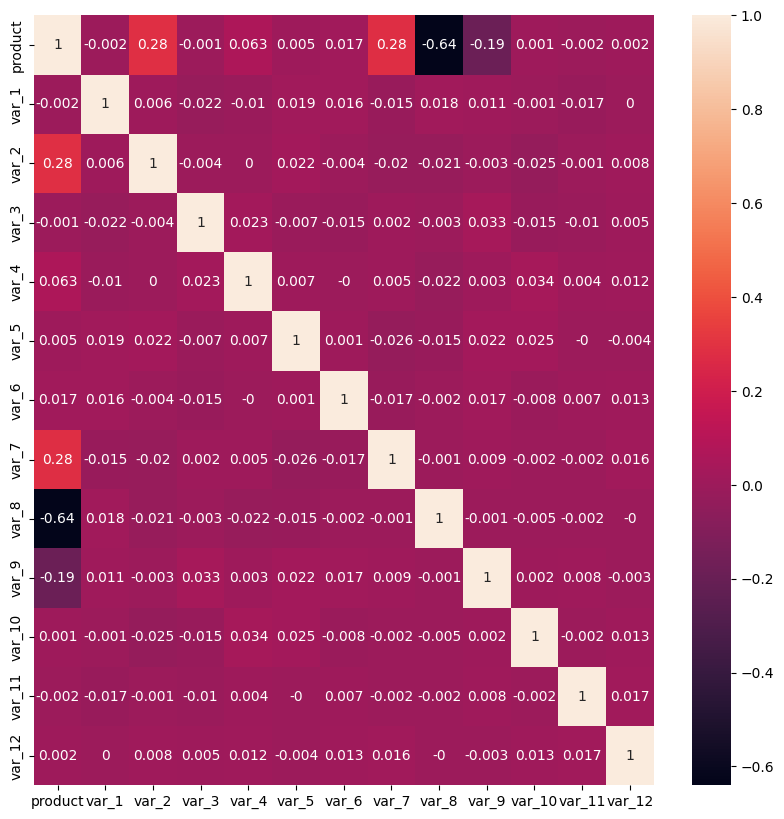

In [11]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(np.round(df_train.corr('spearman'), 3), annot=True, cbar=True, ax=ax)

In [12]:
df_scl = df_train.copy()
df_scl[df_scl.columns[1::]]=(df_scl[df_scl.columns[1::]] - df_scl[df_scl.columns[1::]].min())/(df_scl[df_scl.columns[1::]].max() - df_scl[df_scl.columns[1::]].min())

In [13]:
df_scl

,product,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12
0,0,0.524274,0.0,0.640256,0.0,0.565620,1.0,0.472826,0.0,0.675465,0.0,0.352868,0.582686
1,0,0.474922,0.0,0.396637,1.0,0.658301,0.0,0.358997,1.0,0.540356,0.0,0.662859,0.452190
2,0,0.416301,1.0,0.247651,0.0,0.684994,0.0,0.338902,1.0,0.552279,0.0,0.637834,0.475932
3,1,0.384598,0.0,0.614093,0.0,0.792992,0.0,0.320125,0.0,0.872408,0.0,0.567567,0.497405
4,2,0.437550,0.0,0.228853,0.0,0.591523,0.0,0.520253,0.0,0.512991,0.0,0.498116,0.388434
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,1,0.799505,0.0,0.605389,0.0,0.477300,0.0,0.684735,1.0,0.464723,0.0,0.556657,0.312437
5396,1,0.357447,1.0,0.491721,1.0,0.585352,0.0,0.501148,0.0,0.928252,0.0,0.437870,0.508574
5397,0,0.633550,0.0,0.487968,0.0,0.552057,0.0,0.416282,1.0,0.663591,0.0,0.473878,0.498507
5398,1,0.581721,0.0,0.679494,0.0,0.621876,1.0,0.760316,1.0,0.411024,0.0,0.606783,0.468943


In [14]:
df_scl.max()

product    2.0
var_1      1.0
var_2      1.0
var_3      1.0
var_4      1.0
var_5      1.0
var_6      1.0
var_7      1.0
var_8      1.0
var_9      1.0
var_10     1.0
var_11     1.0
var_12     1.0
dtype: float64

In [15]:
df_scl.min()

product    0.0
var_1      0.0
var_2      0.0
var_3      0.0
var_4      0.0
var_5      0.0
var_6      0.0
var_7      0.0
var_8      0.0
var_9      0.0
var_10     0.0
var_11     0.0
var_12     0.0
dtype: float64

# Моделирование

In [16]:
df_test = pd.read_csv('.\\test.csv', sep=';')

In [17]:
df_test = (df_test - df_test.min())/(df_test.max() - df_test.min())

In [18]:
df_test

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12
0,0.308016,0.0,0.626910,0.0,0.791844,0.0,0.590004,1.0,0.595869,0.0,0.359665,0.577201
1,0.356556,0.0,0.496608,0.0,0.422435,0.0,0.601545,1.0,0.409507,0.0,0.417239,0.712693
2,0.718715,0.0,0.510183,0.0,0.187158,1.0,0.545514,0.0,0.262117,0.0,0.462337,0.362056
3,0.791983,0.0,0.570453,0.0,0.722101,1.0,0.723881,1.0,0.585307,0.0,0.484365,0.389547
4,0.610155,0.0,0.076976,1.0,0.000000,0.0,0.362181,0.0,0.553509,1.0,0.428099,0.522723
...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.585898,1.0,0.667731,0.0,0.417486,0.0,0.635316,1.0,0.428451,0.0,0.555615,0.397090
596,0.716314,1.0,0.298439,0.0,0.873416,1.0,0.453192,1.0,0.583785,0.0,0.009939,0.450338
597,0.652965,0.0,0.636648,0.0,0.267032,0.0,0.534777,1.0,0.416602,1.0,0.386781,0.628088
598,0.618075,0.0,0.455552,0.0,0.374092,1.0,0.521543,0.0,0.506461,0.0,0.437634,0.388867


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df1, df2 = train_test_split(df_scl)

In [21]:
df1

,product,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12
465,1,0.452145,1.0,0.397646,0.0,0.429124,0.0,0.555716,1.0,0.486360,0.0,0.398403,0.461094
1129,0,0.578787,0.0,0.431837,0.0,0.681395,0.0,0.408576,1.0,0.685047,0.0,0.487973,0.566542
2920,1,0.469381,0.0,0.565996,0.0,0.442211,0.0,0.675979,1.0,0.610295,1.0,0.531672,0.564480
1052,1,0.575007,1.0,0.726598,0.0,0.509526,1.0,0.465273,0.0,0.514228,0.0,0.318902,0.655724
462,0,0.676104,0.0,0.360580,1.0,0.656707,1.0,0.540150,1.0,0.545400,0.0,0.680983,0.577708
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,0,0.338840,0.0,0.400197,0.0,0.450030,0.0,0.269472,1.0,0.770499,0.0,0.359708,0.379842
1873,1,0.606962,1.0,0.576591,0.0,0.507910,0.0,0.686469,1.0,0.554880,1.0,0.773364,0.629292
1676,0,0.606793,1.0,0.490399,0.0,0.351290,1.0,0.454249,1.0,0.855641,0.0,0.604870,0.587510
2814,1,0.562503,1.0,0.382097,0.0,0.633904,0.0,0.572280,1.0,0.611585,1.0,0.602813,0.661254


In [22]:
df2

,product,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12
202,0,0.424368,0.0,0.633027,0.0,0.671104,0.0,0.587288,1.0,0.684029,0.0,0.762660,0.554481
248,1,0.348148,1.0,0.399637,0.0,0.570634,0.0,0.463204,0.0,0.896073,0.0,0.653334,0.428660
2763,0,0.882343,0.0,0.640713,0.0,0.663257,0.0,0.142871,1.0,0.704167,0.0,0.620308,0.543269
472,0,0.622394,1.0,0.322232,0.0,0.553939,1.0,0.444947,1.0,0.682312,0.0,0.519736,0.338136
340,0,0.608782,0.0,0.769203,0.0,0.581817,0.0,0.433520,1.0,0.622637,0.0,0.511301,0.252242
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,0,0.695666,0.0,0.485075,0.0,0.339093,0.0,0.521799,1.0,0.780887,1.0,0.285423,0.243112
1667,0,0.591932,0.0,0.549543,0.0,0.604773,1.0,0.595432,1.0,0.594097,0.0,0.584441,0.391817
3269,0,0.444431,0.0,0.489793,0.0,0.440175,0.0,0.459144,1.0,0.715927,1.0,0.407411,0.395947
4878,0,0.406390,0.0,0.331717,0.0,0.726406,0.0,0.557783,1.0,0.516432,0.0,0.555038,0.499339


In [23]:
X = df1[df1.columns[1::]]
y = df1[df1.columns[0]]

In [24]:
X_test = df2[df2.columns[1::]]
y_test = df2[df2.columns[0]]

In [25]:
f1_scores = []

## SVM

In [26]:
from sklearn import svm

In [27]:
svm_clf = svm.SVC()

In [28]:
svm_clf.fit(X, y)

SVC()

In [29]:
from sklearn.metrics import f1_score

In [30]:
f1_scores.append(['SVM', f1_score(y_test, svm_clf.predict(X_test), average='micro')])

## Stochastic Gradient Descent

In [31]:
from sklearn.linear_model import SGDClassifier as SGDC

In [32]:
sgdc_clf = SGDC(loss="hinge", penalty="l2", max_iter=100)

In [33]:
sgdc_clf.fit(X,y)

SGDClassifier(max_iter=100)

In [34]:
f1_scores.append(['Stochastic Gradient Descent', f1_score(y_test, sgdc_clf.predict(X_test), average='micro')])

## KNeighborsClassifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [36]:
knc_clf = KNC(n_neighbors=5)

In [37]:
knc_clf.fit(X, y)

KNeighborsClassifier()

In [38]:
f1_scores.append(['KNeighborsClassifier',f1_score(y_test, knc_clf.predict(X_test), average='micro')])

## RadiusNeighborsClassifier

In [39]:
from sklearn.neighbors import RadiusNeighborsClassifier as RNC

In [40]:
rnc_clf = RNC()

In [41]:
rnc_clf.fit(X, y)

RadiusNeighborsClassifier()

In [42]:
f1_scores.append(['RadiusNeighborsClassifier', f1_score(y_test, rnc_clf.predict(X_test), average='micro')])

## GaussianProcessClassifier

In [43]:
from sklearn.gaussian_process import GaussianProcessClassifier as GPC

In [44]:
gpc_clf = GPC()

In [45]:
gpc_clf.fit(X, y)

GaussianProcessClassifier()

In [46]:
f1_scores.append(['GaussianProcessClassifier', f1_score(y_test, gpc_clf.predict(X_test), average='micro')])

## DecisionTreeClassifier

In [47]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [48]:
dtc_clf = DTC()

In [49]:
dtc_clf.fit(X, y)

DecisionTreeClassifier()

In [50]:
f1_scores.append(['DecisionTreeClassifier', f1_score(y_test, dtc_clf.predict(X_test), average='micro')])

## AdaBoostClassifier

In [51]:
from sklearn.ensemble import AdaBoostClassifier as ABC

In [52]:
abc_clf = ABC()

In [53]:
abc_clf.fit(X,y)

C:\Users\Laptop8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [54]:
f1_scores.append(['AdaBoostClassifier', f1_score(y_test, abc_clf.predict(X_test), average='micro')])

## BaggingClassifier

In [55]:
from sklearn.ensemble import BaggingClassifier as bag

In [56]:
bag_clf = bag()

In [57]:
bag_clf.fit(X, y)

BaggingClassifier()

In [58]:
f1_scores.append(['BaggingClassifier', f1_score(y_test, bag_clf.predict(X_test), average='micro')])

## ExtraTreesClassifier

In [59]:
from sklearn.ensemble import ExtraTreesClassifier as ETC

In [60]:
etc_clf = ETC()

In [61]:
etc_clf.fit(X, y)

ExtraTreesClassifier()

In [62]:
f1_scores.append(['ExtraTreesClassifier', f1_score(y_test, etc_clf.predict(X_test), average='micro')])

## GradientBoostingClassifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [64]:
gbc_clf = GBC()

In [65]:
gbc_clf.fit(X, y)

GradientBoostingClassifier()

In [66]:
f1_scores.append(['GradientBoostingClassifier', f1_score(y_test, gbc_clf.predict(X_test), average='micro')])

## RandomForestClassifier

In [67]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [68]:
rfc_clf = RFC()

In [69]:
rfc_clf.fit(X,y)

RandomForestClassifier()

In [70]:
f1_scores.append(['RandomForestClassifier', f1_score(y_test, rfc_clf.predict(X_test), average='micro')])

## Проверка моделей

In [71]:
f1_scores

[['SVM', 0.8437037037037037],
 ['Stochastic Gradient Descent', 0.8192592592592592],
 ['KNeighborsClassifier', 0.794074074074074],
 ['RadiusNeighborsClassifier', 0.6925925925925925],
 ['GaussianProcessClassifier', 0.8281481481481482],
 ['DecisionTreeClassifier', 0.7785185185185185],
 ['AdaBoostClassifier', 0.6311111111111111],
 ['BaggingClassifier', 0.8533333333333334],
 ['ExtraTreesClassifier', 0.8659259259259259],
 ['GradientBoostingClassifier', 0.8681481481481481],
 ['RandomForestClassifier', 0.8718518518518519]]

## RandomForestClassifier

Text(0, 0.5, 'Время реакции')

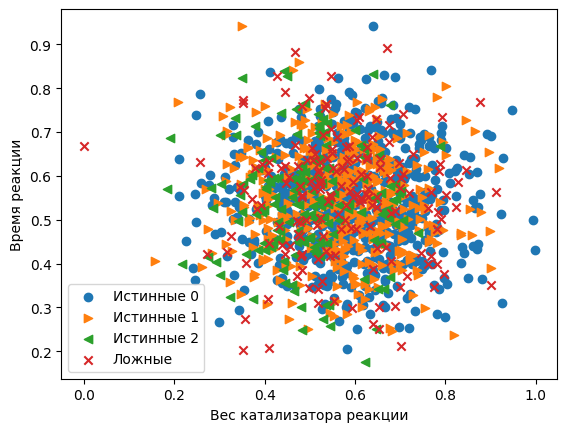

In [72]:
X0True = X_test[(y_test == rfc_clf.predict(X_test)) * (y_test == 0)]
X1True = X_test[(y_test == rfc_clf.predict(X_test)) * (y_test == 1)]
X2True = X_test[(y_test == rfc_clf.predict(X_test)) * (y_test == 2)]
XFalse = X_test[(y_test != rfc_clf.predict(X_test))]

plt.scatter(X0True.var_9, X0True.var_11, marker='o', label='Истинные 0')
plt.scatter(X1True.var_9, X1True.var_11, marker='>', label='Истинные 1')
plt.scatter(X2True.var_9, X2True.var_11, marker='<', label='Истинные 2')
plt.scatter(XFalse.var_9, XFalse.var_11, marker='x', label='Ложные')

plt.legend()
plt.xlabel('Вес катализатора реакции')
plt.ylabel('Время реакции')

In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [74]:
print(classification_report(y_test, rfc_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       669
           1       0.86      0.79      0.82       505
           2       0.88      0.96      0.92       176

    accuracy                           0.87      1350
   macro avg       0.87      0.89      0.88      1350
weighted avg       0.87      0.87      0.87      1350



<Axes: >

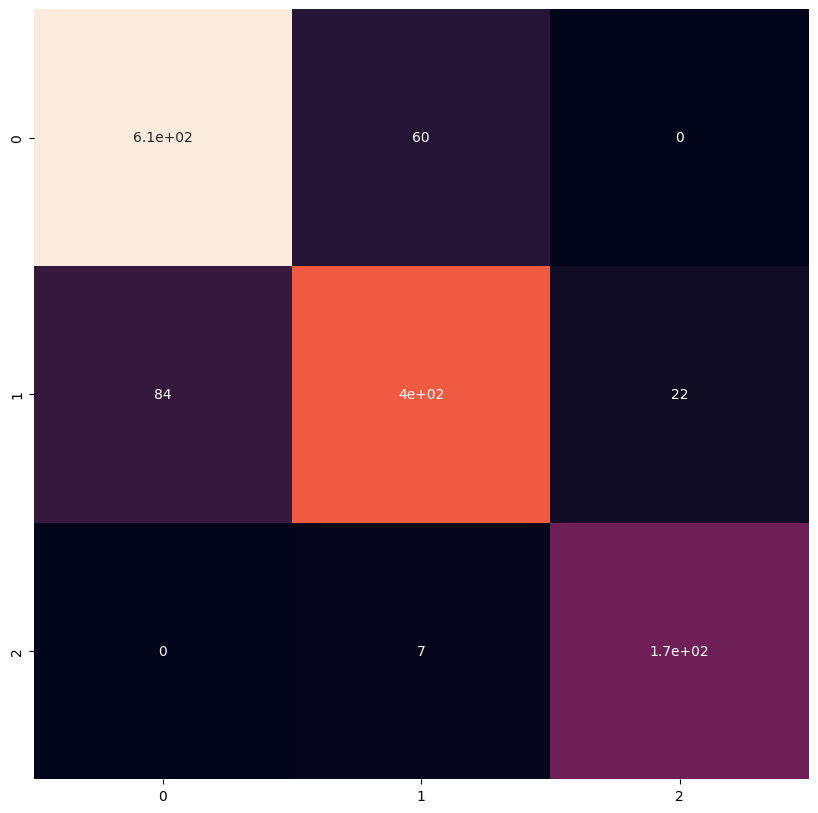

In [81]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, rfc_clf.predict(X_test)), annot=True, cbar=False, ax=ax)

In [77]:
rfc_clf.predict(df_test)

array([0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0,
       1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0,
       1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0,
       2, 0, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2,
       0, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1,
       0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 1,
       0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1,
       0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1,
       1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1,
       0, 2, 0, 2, 1, 2, 0, 0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0,
       2, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 1,
       0, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1,